In [159]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
dataset = pd.read_csv('NVDA_Revenue_Prediction_Data.csv')
dataset.dropna(axis=1,how='all',inplace=True)
dataset["year-quarter"] = dataset["year-quarter"].str.replace("-", "Q")
dataset["year-quarter"] = pd.to_datetime(dataset["year-quarter"]).dt.to_period('Q')
dataset

,year-quarter,MSFT,AMZN,GOOG,NVDA,META,SMCI,TSMC-Revenue
0,2018Q1,2993.0,2727.0,7269.0,3207.0,2812.0,835.0,NaN
1,2018Q2,3980.0,2949.0,5507.0,3123.0,3460.0,981.0,NaN
2,2018Q3,3602.0,2537.0,5282.0,3181.0,3342.0,971.0,NaN
3,2018Q4,3707.0,3120.0,7081.0,2205.0,4301.0,931.0,NaN
4,2019Q1,2565.0,2721.0,4638.0,2220.0,3837.0,743.0,NaN
5,2019Q2,4051.0,2643.0,6126.0,2579.0,3633.0,854.0,NaN
6,2019Q3,3385.0,3385.0,-10764.0,3014.0,3532.0,799.0,293045.0
7,2019Q4,3545.0,3940.0,23548.0,3105.0,4100.0,870.0,317237.0
8,2020Q1,3767.0,5428.0,6005.0,3080.0,3558.0,772.0,310597.0
9,2020Q2,4744.0,6614.0,5391.0,3866.0,3255.0,896.0,310698.0


### Adjust NVDA to only reflect datacenter revenue

In [160]:
22/26

0.8461538461538461

In [161]:
percentages = [25.0, 27.3, 39.4, 40.2, 55.6, 78.0]
years = [2019, 2020, 2021, 2022, 2023, 2024]
NVDA_datacenter_percentages = {
    "year": years,
    "percentage": percentages
}
NVDA_datacenter_percentages = pd.DataFrame(NVDA_datacenter_percentages).rename(columns={"year": "year-quarter"})
NVDA_datacenter_percentages["year-quarter"] = pd.to_datetime(NVDA_datacenter_percentages["year-quarter"].astype(str)).dt.to_period('Q')
# duplicate first 5 rows 4 times
NVDA_datacenter_percentages = pd.concat([NVDA_datacenter_percentages]*4).sort_values(by="year-quarter")
# cumulative  year-quarter
NVDA_datacenter_percentages["year-quarter"] = NVDA_datacenter_percentages["year-quarter"].add(NVDA_datacenter_percentages.groupby("year-quarter").cumcount())
# remove last 3 rows
NVDA_datacenter_percentages = NVDA_datacenter_percentages.iloc[:-3]
# add 2024Q2 with 84.4
NVDA_datacenter_percentages = pd.concat([NVDA_datacenter_percentages,
                                         pd.DataFrame({"year-quarter": pd.Period("2024Q2"), "percentage": [84.4]})]).reset_index(drop=True)
# shift all quarter by 1
NVDA_datacenter_percentages["year-quarter"] = NVDA_datacenter_percentages["year-quarter"].shift(1)

NVDA_datacenter_percentages







,year-quarter,percentage
0,NaT,25.0
1,2019Q1,25.0
2,2019Q2,25.0
3,2019Q3,25.0
4,2019Q4,27.3
5,2020Q1,27.3
6,2020Q2,27.3
7,2020Q3,27.3
8,2020Q4,39.4
9,2021Q1,39.4


In [162]:
import yfinance as yf
msft = yf.Ticker("msft").quarterly_cashflow.T
print(msft.columns)
msft = msft[["Net PPE Purchase And Sale"]]/-1000000
msft = msft.reset_index().rename(columns={"index":"year-quarter"})
msft

Index(['Free Cash Flow', 'Repurchase Of Capital Stock', 'Repayment Of Debt',
       'Issuance Of Debt', 'Issuance Of Capital Stock', 'Capital Expenditure',
       'End Cash Position', 'Beginning Cash Position',
       'Effect Of Exchange Rate Changes', 'Changes In Cash',
       'Financing Cash Flow', 'Cash Flow From Continuing Financing Activities',
       'Net Other Financing Charges', 'Cash Dividends Paid',
       'Common Stock Dividend Paid', 'Net Common Stock Issuance',
       'Common Stock Payments', 'Common Stock Issuance',
       'Net Issuance Payments Of Debt', 'Net Short Term Debt Issuance',
       'Short Term Debt Issuance', 'Net Long Term Debt Issuance',
       'Long Term Debt Payments', 'Long Term Debt Issuance',
       'Investing Cash Flow', 'Cash Flow From Continuing Investing Activities',
       'Net Other Investing Changes', 'Net Investment Purchase And Sale',
       'Sale Of Investment', 'Purchase Of Investment',
       'Net Business Purchase And Sale', 'Purchase Of Bu

,year-quarter,Net PPE Purchase And Sale
0,2024-06-30,13873.0
1,2024-03-31,10952.0
2,2023-12-31,9735.0
3,2023-09-30,9917.0
4,2023-06-30,8943.0
5,2023-03-31,NaN


In [163]:
# transform year-quarter datetime to year-quarter format
msft['year-quarter'] = pd.to_datetime(msft['year-quarter'])
msft['year-quarter'] = msft['year-quarter'].dt.to_period('Q')
msft

,year-quarter,Net PPE Purchase And Sale
0,2024Q2,13873.0
1,2024Q1,10952.0
2,2023Q4,9735.0
3,2023Q3,9917.0
4,2023Q2,8943.0
5,2023Q1,NaN


In [164]:
merge_df = pd.merge(dataset, msft, how='outer', on='year-quarter')
merge_df["MSFT"].fillna(merge_df["Net PPE Purchase And Sale"], inplace=True)
merge_df = merge_df.drop(columns=["Net PPE Purchase And Sale"])
merge_df

,year-quarter,MSFT,AMZN,GOOG,NVDA,META,SMCI,TSMC-Revenue
0,2018Q1,2993.0,2727.0,7269.0,3207.0,2812.0,835.0,NaN
1,2018Q2,3980.0,2949.0,5507.0,3123.0,3460.0,981.0,NaN
2,2018Q3,3602.0,2537.0,5282.0,3181.0,3342.0,971.0,NaN
3,2018Q4,3707.0,3120.0,7081.0,2205.0,4301.0,931.0,NaN
4,2019Q1,2565.0,2721.0,4638.0,2220.0,3837.0,743.0,NaN
5,2019Q2,4051.0,2643.0,6126.0,2579.0,3633.0,854.0,NaN
6,2019Q3,3385.0,3385.0,-10764.0,3014.0,3532.0,799.0,293045.0
7,2019Q4,3545.0,3940.0,23548.0,3105.0,4100.0,870.0,317237.0
8,2020Q1,3767.0,5428.0,6005.0,3080.0,3558.0,772.0,310597.0
9,2020Q2,4744.0,6614.0,5391.0,3866.0,3255.0,896.0,310698.0


In [165]:
amazon_fullfillment_center = yf.Ticker("AMZN").quarterly_cashflow.T

In [166]:
second_dataframe = yf.Ticker("amzn").quarterly_cashflow.T
second_dataframe = second_dataframe[["Net PPE Purchase And Sale"]]/-1000000
second_dataframe = second_dataframe.reset_index().rename(columns={"index":"year-quarter"})

second_dataframe['year-quarter'] = second_dataframe['year-quarter'].dt.to_period('Q')
second_dataframe

,year-quarter,Net PPE Purchase And Sale
0,2024Q2,16393.0
1,2024Q1,13935.0
2,2023Q4,13353.0
3,2023Q3,11298.0
4,2023Q2,10412.0
5,2023Q1,NaN


In [167]:
def fill_last_quarter(df, stock: str):
    second_dataframe = yf.Ticker(f"{stock}").quarterly_cashflow.T
    second_dataframe = second_dataframe[["Net PPE Purchase And Sale"]]/-1000000
    second_dataframe = second_dataframe.reset_index().rename(columns={"index":"year-quarter"})

    second_dataframe['year-quarter'] = second_dataframe['year-quarter'].dt.to_period('Q')

    merge_df = pd.merge(df, second_dataframe, how='outer', on='year-quarter')

    stock = stock.upper()
    merge_df[f"{stock}"].fillna(merge_df["Net PPE Purchase And Sale"], inplace=True)
    merge_df = merge_df.drop(columns=["Net PPE Purchase And Sale"])
    return merge_df

merge_df = fill_last_quarter(merge_df, "amzn")
merge_df = fill_last_quarter(merge_df, "goog")
merge_df = fill_last_quarter(merge_df, "meta")
merge_df

,year-quarter,MSFT,AMZN,GOOG,NVDA,META,SMCI,TSMC-Revenue
0,2018Q1,2993.0,2727.0,7269.0,3207.0,2812.0,835.0,NaN
1,2018Q2,3980.0,2949.0,5507.0,3123.0,3460.0,981.0,NaN
2,2018Q3,3602.0,2537.0,5282.0,3181.0,3342.0,971.0,NaN
3,2018Q4,3707.0,3120.0,7081.0,2205.0,4301.0,931.0,NaN
4,2019Q1,2565.0,2721.0,4638.0,2220.0,3837.0,743.0,NaN
5,2019Q2,4051.0,2643.0,6126.0,2579.0,3633.0,854.0,NaN
6,2019Q3,3385.0,3385.0,-10764.0,3014.0,3532.0,799.0,293045.0
7,2019Q4,3545.0,3940.0,23548.0,3105.0,4100.0,870.0,317237.0
8,2020Q1,3767.0,5428.0,6005.0,3080.0,3558.0,772.0,310597.0
9,2020Q2,4744.0,6614.0,5391.0,3866.0,3255.0,896.0,310698.0


In [168]:
def fill_nan_with_average(col):
    non_nan_values = col.dropna()[:4]  # Get the first 4 non-NaN values
    if len(non_nan_values) == 0:
        return col  # If there are no non-NaN values, return the column as it is
    average_value = non_nan_values.mean()  # Calculate the average
    return col.fillna(average_value)  # Fill NaN values with the calculated average

# Apply the function to each column
merge_df["TSMC-Revenue"] = fill_nan_with_average(merge_df["TSMC-Revenue"])
merge_df

,year-quarter,MSFT,AMZN,GOOG,NVDA,META,SMCI,TSMC-Revenue
0,2018Q1,2993.0,2727.0,7269.0,3207.0,2812.0,835.0,307894.25
1,2018Q2,3980.0,2949.0,5507.0,3123.0,3460.0,981.0,307894.25
2,2018Q3,3602.0,2537.0,5282.0,3181.0,3342.0,971.0,307894.25
3,2018Q4,3707.0,3120.0,7081.0,2205.0,4301.0,931.0,307894.25
4,2019Q1,2565.0,2721.0,4638.0,2220.0,3837.0,743.0,307894.25
5,2019Q2,4051.0,2643.0,6126.0,2579.0,3633.0,854.0,307894.25
6,2019Q3,3385.0,3385.0,-10764.0,3014.0,3532.0,799.0,293045.00
7,2019Q4,3545.0,3940.0,23548.0,3105.0,4100.0,870.0,317237.00
8,2020Q1,3767.0,5428.0,6005.0,3080.0,3558.0,772.0,310597.00
9,2020Q2,4744.0,6614.0,5391.0,3866.0,3255.0,896.0,310698.00


In [169]:
merge_df["SMCI"].fillna(5310.0, inplace=True)
merge_df

,year-quarter,MSFT,AMZN,GOOG,NVDA,META,SMCI,TSMC-Revenue
0,2018Q1,2993.0,2727.0,7269.0,3207.0,2812.0,835.0,307894.25
1,2018Q2,3980.0,2949.0,5507.0,3123.0,3460.0,981.0,307894.25
2,2018Q3,3602.0,2537.0,5282.0,3181.0,3342.0,971.0,307894.25
3,2018Q4,3707.0,3120.0,7081.0,2205.0,4301.0,931.0,307894.25
4,2019Q1,2565.0,2721.0,4638.0,2220.0,3837.0,743.0,307894.25
5,2019Q2,4051.0,2643.0,6126.0,2579.0,3633.0,854.0,307894.25
6,2019Q3,3385.0,3385.0,-10764.0,3014.0,3532.0,799.0,293045.00
7,2019Q4,3545.0,3940.0,23548.0,3105.0,4100.0,870.0,317237.00
8,2020Q1,3767.0,5428.0,6005.0,3080.0,3558.0,772.0,310597.00
9,2020Q2,4744.0,6614.0,5391.0,3866.0,3255.0,896.0,310698.00


In [170]:
amazon_adjustments = [
    {
        "year":2018,
        "AWS":9783,
        "Total":25068,
    },
    {
        "year":2019,
        "AWS":12058,
        "Total":30018,
    },
    {
        "year":2020,
        "AWS":16530,
        "Total":58976,
    },
    {
        "year":2021,
        "AWS":22047,
        "Total":72325,
    },
    {
        "year":2022,
        "AWS":27755,
        "Total":60836,
    },
    {
        "year":2023,
        "AWS":24843,
        "Total":48344,
    },
]

amazon_adjustments_df = pd.DataFrame(amazon_adjustments)
amazon_adjustments_df["Non_AWS_PPE"] = amazon_adjustments_df["Total"] - amazon_adjustments_df["AWS"]
# transform year to year-quarter, duplicate the year-quarter for 4 quarters, divide absolute values by 4
amazon_adjustments_df["year"] = pd.to_datetime(amazon_adjustments_df["year"], format='%Y')
amazon_adjustments_df["year-quarter"] = amazon_adjustments_df["year"].dt.to_period('Q')
amazon_adjustments_df = amazon_adjustments_df.drop(columns=["year"])
amazon_adjustments_df = amazon_adjustments_df.loc[amazon_adjustments_df.index.repeat(4)].reset_index(drop=True)

# # add 2 more rows duplicate the last row
# amazon_adjustments_df = pd.concat([amazon_adjustments_df,amazon_adjustments_df.tail(2)]).reset_index(drop=True)

# replace year-quarter with the incremented quarter

amazon_adjustments_df["year-quarter"] = amazon_adjustments_df["year-quarter"].add(amazon_adjustments_df.groupby("year-quarter").cumcount())



# change increment year-quarter
amazon_adjustments_df["AWS"] = amazon_adjustments_df["AWS"] / 4
amazon_adjustments_df["Total"] = amazon_adjustments_df["Total"] / 4
amazon_adjustments_df["Non_AWS_PPE"] = amazon_adjustments_df["Total"] - amazon_adjustments_df["AWS"]
amazon_adjustments_df.rename(columns={"Non_AWS_PPE":"AMZN-Non-AWS","Total":"AMZN_Total"}, inplace=True)
amazon_adjustments_df


,AWS,AMZN_Total,AMZN-Non-AWS,year-quarter
0,2445.75,6267.00,3821.25,2018Q1
1,2445.75,6267.00,3821.25,2018Q2
2,2445.75,6267.00,3821.25,2018Q3
3,2445.75,6267.00,3821.25,2018Q4
4,3014.50,7504.50,4490.00,2019Q1
5,3014.50,7504.50,4490.00,2019Q2
6,3014.50,7504.50,4490.00,2019Q3
7,3014.50,7504.50,4490.00,2019Q4
8,4132.50,14744.00,10611.50,2020Q1
9,4132.50,14744.00,10611.50,2020Q2


In [171]:
merge_df_2 = pd.merge(merge_df, amazon_adjustments_df, how='outer', on='year-quarter')
amzn_source_primary_to_secondary_multiplier = merge_df_2["AMZN_Total"].iloc[20:24].sum() / merge_df_2["AMZN"].iloc[20:24].sum()
merge_df_2["AMZN_Total"].fillna(merge_df_2["AMZN"]*amzn_source_primary_to_secondary_multiplier, inplace=True)
merge_df_2["AMZN-Non-AWS"].ffill(inplace=True)
merge_df_2["AWS"].fillna(merge_df_2["AMZN_Total"]-merge_df_2["AMZN-Non-AWS"], inplace=True)
merge_df_2["AWS_PPE_Percentage"] = merge_df_2["AWS"] / merge_df_2["AMZN_Total"]
merge_df_2["AMZN"] = merge_df_2["AMZN"] * merge_df_2["AWS_PPE_Percentage"]

print(amzn_source_primary_to_secondary_multiplier)
# merge_df["AMZN_adjusted"] = merge_df["AMZN"] * amazon_adjustments_df["AWS_PPE_Percentage"]
# merge_df["AMZN_adjusted"].fillna(merge_df["AMZN"], inplace=True)
# merge_df["AMZN"] = merge_df["AMZN_adjusted"]
# merge_df = merge_df.drop(columns=["AMZN_adjusted"])

merge_df_2

1.0043836868676377


,year-quarter,MSFT,AMZN,GOOG,NVDA,META,SMCI,TSMC-Revenue,AWS,AMZN_Total,AMZN-Non-AWS,AWS_PPE_Percentage
0,2018Q1,2993.0,1064.234921,7269.0,3207.0,2812.0,835.0,307894.25,2445.750000,6267.000000,3821.25,0.390258
1,2018Q2,3980.0,1150.872307,5507.0,3123.0,3460.0,981.0,307894.25,2445.750000,6267.000000,3821.25,0.390258
2,2018Q3,3602.0,990.085807,5282.0,3181.0,3342.0,971.0,307894.25,2445.750000,6267.000000,3821.25,0.390258
3,2018Q4,3707.0,1217.606510,7081.0,2205.0,4301.0,931.0,307894.25,2445.750000,6267.000000,3821.25,0.390258
4,2019Q1,2565.0,1093.004797,4638.0,2220.0,3837.0,743.0,307894.25,3014.500000,7504.500000,4490.00,0.401692
5,2019Q2,4051.0,1061.672796,6126.0,2579.0,3633.0,854.0,307894.25,3014.500000,7504.500000,4490.00,0.401692
6,2019Q3,3385.0,1359.728496,-10764.0,3014.0,3532.0,799.0,293045.00,3014.500000,7504.500000,4490.00,0.401692
7,2019Q4,3545.0,1582.667733,23548.0,3105.0,4100.0,870.0,317237.00,3014.500000,7504.500000,4490.00,0.401692
8,2020Q1,3767.0,1521.378866,6005.0,3080.0,3558.0,772.0,310597.00,4132.500000,14744.000000,10611.50,0.280284
9,2020Q2,4744.0,1853.795103,5391.0,3866.0,3255.0,896.0,310698.00,4132.500000,14744.000000,10611.50,0.280284


In [172]:
merge_df_2 = pd.merge(merge_df_2, NVDA_datacenter_percentages, how='left', on='year-quarter')
merge_df_2.rename(columns={"percentage":"NVDA_datacenter_percentage"}, inplace=True)
merge_df_2["NVDA_datacenter_percentage"] = merge_df_2["NVDA_datacenter_percentage"].fillna(method='bfill')
merge_df_2["entire_NVDA_revenue"] = merge_df_2["NVDA"] 
merge_df_2["NVDA"] = merge_df_2["NVDA"] * (merge_df_2["NVDA_datacenter_percentage"]/100)
last_nvda_non_datacenter = merge_df_2["entire_NVDA_revenue"].iloc[24]- merge_df_2["NVDA"].iloc[24]
print(f"last_nvda_non_datacenter: {last_nvda_non_datacenter}")
JUST_DATACENTER = True
merge_df_2

last_nvda_non_datacenter: 4062.8639999999978


,year-quarter,MSFT,AMZN,GOOG,NVDA,META,SMCI,TSMC-Revenue,AWS,AMZN_Total,AMZN-Non-AWS,AWS_PPE_Percentage,NVDA_datacenter_percentage,entire_NVDA_revenue
0,2018Q1,2993.0,1064.234921,7269.0,801.750,2812.0,835.0,307894.25,2445.750000,6267.000000,3821.25,0.390258,25.0,3207.0
1,2018Q2,3980.0,1150.872307,5507.0,780.750,3460.0,981.0,307894.25,2445.750000,6267.000000,3821.25,0.390258,25.0,3123.0
2,2018Q3,3602.0,990.085807,5282.0,795.250,3342.0,971.0,307894.25,2445.750000,6267.000000,3821.25,0.390258,25.0,3181.0
3,2018Q4,3707.0,1217.606510,7081.0,551.250,4301.0,931.0,307894.25,2445.750000,6267.000000,3821.25,0.390258,25.0,2205.0
4,2019Q1,2565.0,1093.004797,4638.0,555.000,3837.0,743.0,307894.25,3014.500000,7504.500000,4490.00,0.401692,25.0,2220.0
5,2019Q2,4051.0,1061.672796,6126.0,644.750,3633.0,854.0,307894.25,3014.500000,7504.500000,4490.00,0.401692,25.0,2579.0
6,2019Q3,3385.0,1359.728496,-10764.0,753.500,3532.0,799.0,293045.00,3014.500000,7504.500000,4490.00,0.401692,25.0,3014.0
7,2019Q4,3545.0,1582.667733,23548.0,847.665,4100.0,870.0,317237.00,3014.500000,7504.500000,4490.00,0.401692,27.3,3105.0
8,2020Q1,3767.0,1521.378866,6005.0,840.840,3558.0,772.0,310597.00,4132.500000,14744.000000,10611.50,0.280284,27.3,3080.0
9,2020Q2,4744.0,1853.795103,5391.0,1055.418,3255.0,896.0,310698.00,4132.500000,14744.000000,10611.50,0.280284,27.3,3866.0


In [173]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from sklearn.base import BaseEstimator, RegressorMixin
from statsmodels.genmod.families import Gaussian

class BoundedGLM(BaseEstimator, RegressorMixin):
    def __init__(self, family=Gaussian(), bounds=(0, 2)):
        self.family = family
        self.bounds = bounds
        self.coef_ = None
        self.intercept_ = None

    def _neg_log_likelihood(self, coef, X, y):
        # Linear prediction
        linear_prediction = np.dot(X, coef)
        # Use the link function to get the mean
        mu = self.family.link.inverse(linear_prediction)
        # Calculate the negative log-likelihood
        nll = -np.sum(self.family.loglike(y, mu))
        return nll

    def fit(self, X, y):
        # Add intercept to the features
        X = np.column_stack((np.ones(X.shape[0]), X))

        # Initial guess for the coefficients (including intercept)
        initial_coef = np.zeros(X.shape[1])

        # Define bounds for the coefficients
        bounds = [self.bounds] * X.shape[1]
        bounds[0] = (None, None)  # No bounds on intercept

        # Minimize the negative log-likelihood with bounded coefficients
        result = minimize(self._neg_log_likelihood, initial_coef, args=(X, y), bounds=bounds)

        # Extract the optimized coefficients
        self.coef_ = result.x[1:]
        self.intercept_ = result.x[0]
        
        # Ensure coefficients are within bounds by clipping
        self.coef_ = np.clip(self.coef_, self.bounds[0], self.bounds[1])

        return self

    def predict(self, X):
        # Predict using the learned coefficients
        linear_prediction = self.intercept_ + np.dot(X, self.coef_)
        return self.family.link.inverse(linear_prediction)

    def get_params(self, deep=True):
        return {"family": self.family, "bounds": self.bounds}

    def set_params(self, **params):
        self.family = params.get("family", self.family)
        self.bounds = params.get("bounds", self.bounds)
        return self

In [182]:
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Gaussian
test_set_row_len = 1
max_row_number = len(merge_df_2)
test_set_row_number = max_row_number - 1
print(f'Test set row number: {test_set_row_number}')
print(f'Max row number: {max_row_number}')
pred_row_number = test_set_row_number
max_train_row_number = test_set_row_number-test_set_row_len
print(f'Max train row number: {max_train_row_number}')
print(f'Pred row number: {pred_row_number}')

original_features = ["AMZN", "GOOG", "MSFT", "META", "SMCI", "TSMC-Revenue"]
X = merge_df_2[original_features]

X_train = X.iloc[:max_train_row_number]
y_train = merge_df_2["NVDA"].iloc[:max_train_row_number]

X_test = X.iloc[max_train_row_number:test_set_row_number]
y_test = merge_df_2["NVDA"].iloc[max_train_row_number:test_set_row_number]

glm_X_pred = X.iloc[pred_row_number:]

glm_model = GLM(y_train, X_train, family=Gaussian()).fit()

glm_y_pred_test = glm_model.predict(X_test)

print(f'Predicted (Row 24): {glm_y_pred_test}, Actual: {y_test.to_numpy()}')

glm_y_pred_next = glm_model.predict(glm_X_pred)
if JUST_DATACENTER:
    y_pred_next = glm_y_pred_next + last_nvda_non_datacenter

print(f'Predicted NVIDIA Revenue for Row 25: {y_pred_next}')

# Predicted (Row 24): 24875.60125209669, Actual: 26044.0


Test set row number: 25
Max row number: 26
Max train row number: 24
Pred row number: 25
Predicted (Row 24): 24    20298.950779
dtype: float64, Actual: [21981.136]
Predicted NVIDIA Revenue for Row 25: 25    33276.692324
dtype: float64


In [175]:
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Gaussian
test_set_row_len = 1
max_row_number = len(merge_df_2)
test_set_row_number = max_row_number - 1
print(f'Test set row number: {test_set_row_number}')
print(f'Max row number: {max_row_number}')
pred_row_number = test_set_row_number
max_train_row_number = test_set_row_number-test_set_row_len
print(f'Max train row number: {max_train_row_number}')
print(f'Pred row number: {pred_row_number}')

original_features = ["AMZN", "GOOG", "MSFT", "META", "SMCI", "TSMC-Revenue"]
X = merge_df_2[original_features]

X_train = X.iloc[:max_train_row_number]
y_train = merge_df_2["NVDA"].iloc[:max_train_row_number]

X_test = X.iloc[max_train_row_number:test_set_row_number]
y_test = merge_df_2["NVDA"].iloc[max_train_row_number:test_set_row_number]

X_pred = X.iloc[pred_row_number:]

model = BoundedGLM().fit(X_train, y_train)

y_pred_test = model.predict(X_test)

print(f'Predicted (Row 24): {y_pred_test}, Actual: {y_test.to_numpy()}')

y_pred_next = model.predict(X_pred)
if JUST_DATACENTER:
    y_pred_next = y_pred_next + last_nvda_non_datacenter

print(f'Predicted NVIDIA Revenue for Row 25: {y_pred_next}')

# Predicted (Row 24): 24875.60125209669, Actual: 26044.0


Test set row number: 25
Max row number: 26
Max train row number: 24
Pred row number: 25
Predicted (Row 24): [14077.31154079], Actual: [21981.136]
Predicted NVIDIA Revenue for Row 25: [24102.42879121]


In [176]:
import numpy as np
absolute_error = np.mean(abs(y_test - y_pred_test))
absolute_error

np.float64(7903.824459205247)

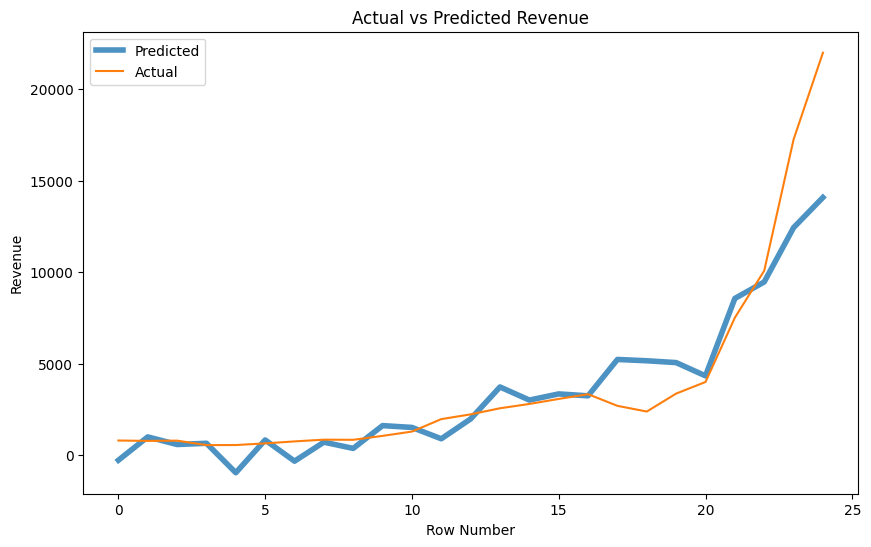

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# Combine training and test predictions and actual values
pred = np.concatenate([pred_train, pred_test])
actual = np.concatenate([y_train, y_test])

# Plotting
plt.figure(figsize=(10, 6))

# Plot predicted values: wider and shallower
sns.lineplot(x=range(len(pred)), y=pred, label='Predicted', linewidth=4, alpha=0.8)

# Plot actual values: denser line
sns.lineplot(x=range(len(actual)), y=actual, label='Actual', linewidth=1.5, alpha=1)

# Add labels and title
plt.xlabel('Row Number')
plt.ylabel('Revenue')
plt.title('Actual vs Predicted Revenue')

# Show the legend
plt.legend()

# Display the plot
plt.show()


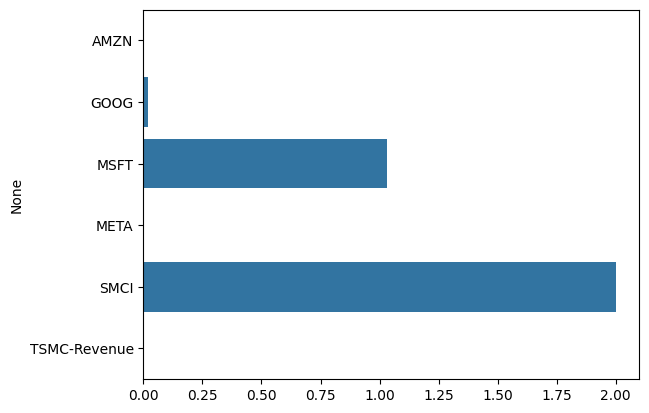

In [178]:
import seaborn as sns

# plot feature Coefficients with seaborn
importance = model.coef_

sns.barplot(x=importance, y=X.columns)
plt.show()


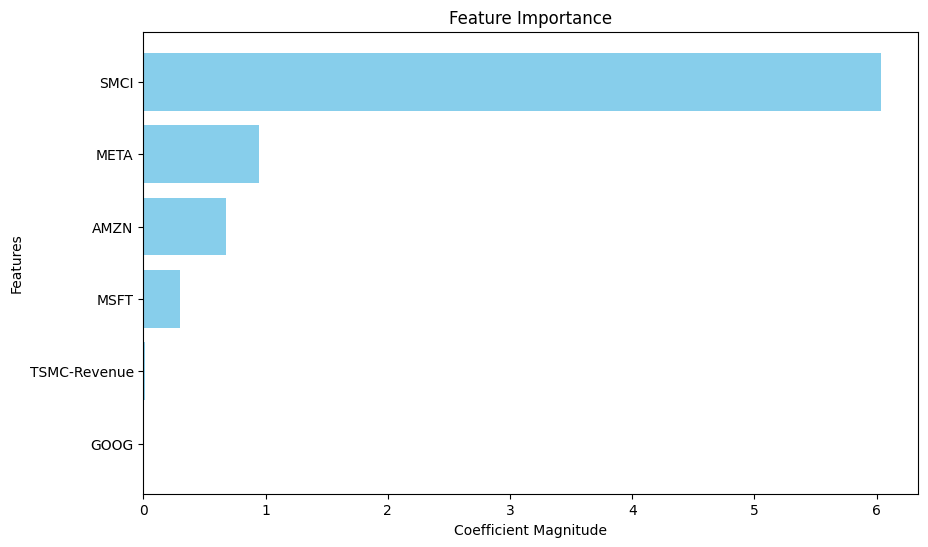

In [183]:
coefficients = glm_model.params.values
features = X_train.columns

# Calculate the absolute values of the coefficients
importance = np.abs(coefficients)

# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To have the most important feature at the top
plt.show()

In [139]:
from sklearn.linear_model import LinearRegression

test_set_row_len = 1
max_row_number = len(merge_df_2)
test_set_row_number = max_row_number - 1
print(f'Test set row number: {test_set_row_number}')
print(f'Max row number: {max_row_number}')
pred_row_number = test_set_row_number
max_train_row_number = test_set_row_number-test_set_row_len
print(f'Max train row number: {max_train_row_number}')
print(f'Pred row number: {pred_row_number}')

X = merge_df_2[original_features]

X_train = X.iloc[20:max_train_row_number]
y_train = merge_df_2["NVDA"].iloc[20:max_train_row_number]

X_test = X.iloc[max_train_row_number:test_set_row_number]
y_test = merge_df_2["NVDA"].iloc[max_train_row_number:test_set_row_number]

X_pred = X.iloc[pred_row_number:]

model = BoundedGLM()
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)

print(f'Predicted (Row 24): {y_pred_test}, Actual: {y_test.to_numpy()}')

y_pred_next = model.predict(X_pred)[0]
if JUST_DATACENTER:
    y_pred_next = y_pred_next + last_nvda_non_datacenter

print(f'Predicted NVIDIA Revenue for Row 25: {y_pred_next}')

# Predicted (Row 24): 24875.60125209669, Actual: 26044.0


Test set row number: 25
Max row number: 26
Max train row number: 24
Pred row number: 25
Predicted (Row 24): [19833.57185163], Actual: [21981.136]
Predicted NVIDIA Revenue for Row 25: 29632.045416691548


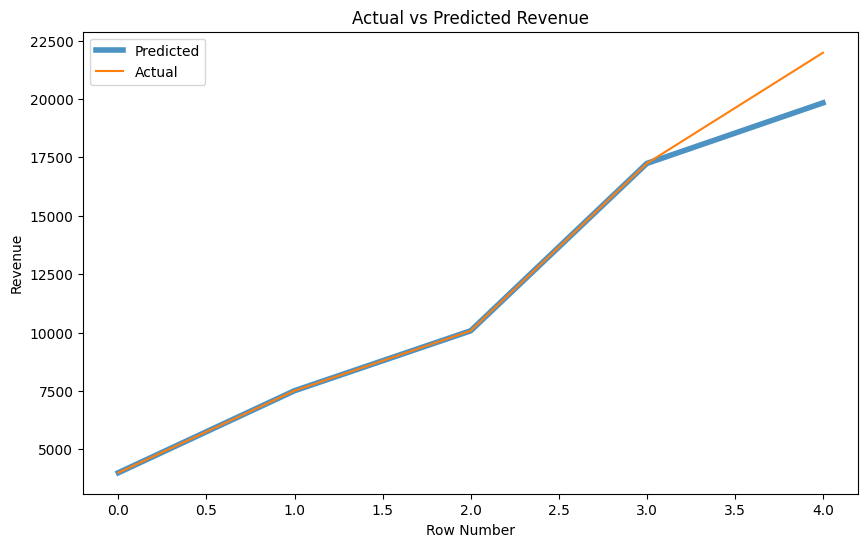

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# Combine training and test predictions and actual values
pred = np.concatenate([pred_train, pred_test])
actual = np.concatenate([y_train, y_test])

# Plotting
plt.figure(figsize=(10, 6))

# Plot predicted values: wider and shallower
sns.lineplot(x=range(len(pred)), y=pred, label='Predicted', linewidth=4, alpha=0.8)

# Plot actual values: denser line
sns.lineplot(x=range(len(actual)), y=actual, label='Actual', linewidth=1.5, alpha=1)

# Add labels and title
plt.xlabel('Row Number')
plt.ylabel('Revenue')
plt.title('Actual vs Predicted Revenue')

# Show the legend
plt.legend()

# Display the plot
plt.show()

In [141]:
merge_df_2

,year-quarter,MSFT,AMZN,GOOG,NVDA,META,SMCI,TSMC-Revenue,AWS,AMZN_Total,AMZN-Non-AWS,AWS_PPE_Percentage,NVDA_datacenter_percentage,entire_NVDA_revenue
0,2018Q1,2993.0,1064.234921,7269.0,801.750,2812.0,835.0,307894.25,2445.750000,6267.000000,3821.25,0.390258,25.0,3207.0
1,2018Q2,3980.0,1150.872307,5507.0,780.750,3460.0,981.0,307894.25,2445.750000,6267.000000,3821.25,0.390258,25.0,3123.0
2,2018Q3,3602.0,990.085807,5282.0,795.250,3342.0,971.0,307894.25,2445.750000,6267.000000,3821.25,0.390258,25.0,3181.0
3,2018Q4,3707.0,1217.606510,7081.0,551.250,4301.0,931.0,307894.25,2445.750000,6267.000000,3821.25,0.390258,25.0,2205.0
4,2019Q1,2565.0,1093.004797,4638.0,555.000,3837.0,743.0,307894.25,3014.500000,7504.500000,4490.00,0.401692,25.0,2220.0
5,2019Q2,4051.0,1061.672796,6126.0,644.750,3633.0,854.0,307894.25,3014.500000,7504.500000,4490.00,0.401692,25.0,2579.0
6,2019Q3,3385.0,1359.728496,-10764.0,753.500,3532.0,799.0,293045.00,3014.500000,7504.500000,4490.00,0.401692,25.0,3014.0
7,2019Q4,3545.0,1582.667733,23548.0,847.665,4100.0,870.0,317237.00,3014.500000,7504.500000,4490.00,0.401692,27.3,3105.0
8,2020Q1,3767.0,1521.378866,6005.0,840.840,3558.0,772.0,310597.00,4132.500000,14744.000000,10611.50,0.280284,27.3,3080.0
9,2020Q2,4744.0,1853.795103,5391.0,1055.418,3255.0,896.0,310698.00,4132.500000,14744.000000,10611.50,0.280284,27.3,3866.0


In [142]:
chatgpt_appearance_quarter = pd.Period("2022Q4")
chatgpt_appearance_quarter

Period('2022Q4', 'Q-DEC')

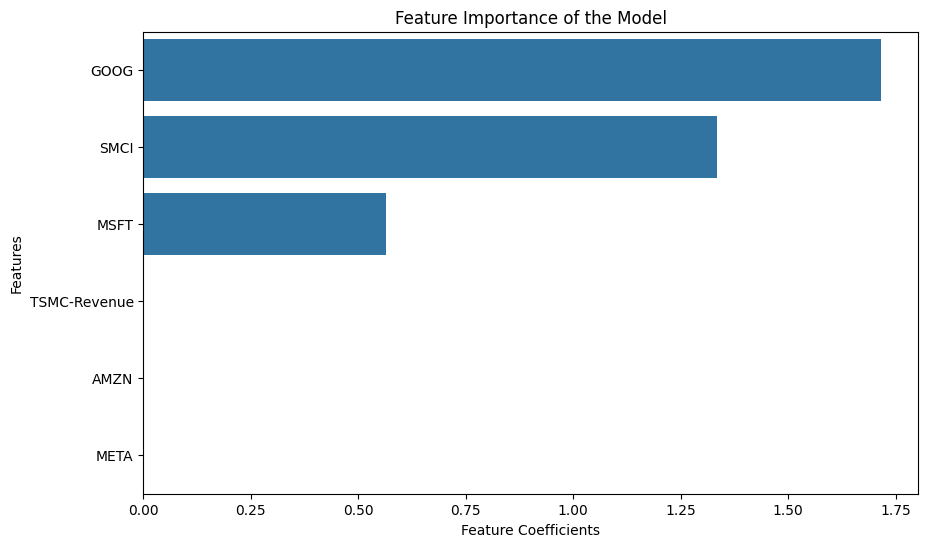

In [143]:
# plot feature importance

import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = model.coef_
feature_importance = pd.Series(feature_importance, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Feature Coefficients')
plt.ylabel('Features')
plt.title('Feature Importance of the Model')
plt.show()

In [144]:
merge_df = merge_df_2.copy()
for feature in original_features:
    merge_df[feature] = fill_nan_with_average(merge_df[feature])
    # chatgpt_excess_revenue_compared or revenue to average from previous year
    merge_df[f"{feature}-excess-feature"] = 0
    avg_1_year_feature_before_gpt = merge_df[
        merge_df["year-quarter"] <= chatgpt_appearance_quarter
    ].iloc[-4:][feature].mean()
    print(f"Average of {feature} before GPT: {avg_1_year_feature_before_gpt}")
    merge_df[f"{feature}-excess-feature"] = np.where(merge_df["year-quarter"] > chatgpt_appearance_quarter, merge_df[feature] - merge_df[feature].mean(), 0)

    # remaining feature after subtracting the excess feature

    merge_df[f"{feature}-remaining-feature"] = merge_df[feature] - merge_df[f"{feature}-excess-feature"]
    



merge_df

Average of AMZN before GPT: 6651.897540107831
Average of GOOG before GPT: 7871.25
Average of MSFT before GPT: 6169.5
Average of META before GPT: 7796.5
Average of SMCI before GPT: 1661.25
Average of TSMC-Revenue before GPT: 565973.0


,year-quarter,MSFT,AMZN,GOOG,NVDA,META,SMCI,TSMC-Revenue,AWS,AMZN_Total,...,GOOG-excess-feature,GOOG-remaining-feature,MSFT-excess-feature,MSFT-remaining-feature,META-excess-feature,META-remaining-feature,SMCI-excess-feature,SMCI-remaining-feature,TSMC-Revenue-excess-feature,TSMC-Revenue-remaining-feature
0,2018Q1,2993.0,1064.234921,7269.0,801.750,2812.0,835.0,307894.25,2445.750000,6267.000000,...,0.000000,7269.000000,0.000000,2993.000000,0.000000,2812.000000,0.000000,835.000000,0.00,307894.25
1,2018Q2,3980.0,1150.872307,5507.0,780.750,3460.0,981.0,307894.25,2445.750000,6267.000000,...,0.000000,5507.000000,0.000000,3980.000000,0.000000,3460.000000,0.000000,981.000000,0.00,307894.25
2,2018Q3,3602.0,990.085807,5282.0,795.250,3342.0,971.0,307894.25,2445.750000,6267.000000,...,0.000000,5282.000000,0.000000,3602.000000,0.000000,3342.000000,0.000000,971.000000,0.00,307894.25
3,2018Q4,3707.0,1217.606510,7081.0,551.250,4301.0,931.0,307894.25,2445.750000,6267.000000,...,0.000000,7081.000000,0.000000,3707.000000,0.000000,4301.000000,0.000000,931.000000,0.00,307894.25
4,2019Q1,2565.0,1093.004797,4638.0,555.000,3837.0,743.0,307894.25,3014.500000,7504.500000,...,0.000000,4638.000000,0.000000,2565.000000,0.000000,3837.000000,0.000000,743.000000,0.00,307894.25
5,2019Q2,4051.0,1061.672796,6126.0,644.750,3633.0,854.0,307894.25,3014.500000,7504.500000,...,0.000000,6126.000000,0.000000,4051.000000,0.000000,3633.000000,0.000000,854.000000,0.00,307894.25
6,2019Q3,3385.0,1359.728496,-10764.0,753.500,3532.0,799.0,293045.00,3014.500000,7504.500000,...,0.000000,-10764.000000,0.000000,3385.000000,0.000000,3532.000000,0.000000,799.000000,0.00,293045.00
7,2019Q4,3545.0,1582.667733,23548.0,847.665,4100.0,870.0,317237.00,3014.500000,7504.500000,...,0.000000,23548.000000,0.000000,3545.000000,0.000000,4100.000000,0.000000,870.000000,0.00,317237.00
8,2020Q1,3767.0,1521.378866,6005.0,840.840,3558.0,772.0,310597.00,4132.500000,14744.000000,...,0.000000,6005.000000,0.000000,3767.000000,0.000000,3558.000000,0.000000,772.000000,0.00,310597.00
9,2020Q2,4744.0,1853.795103,5391.0,1055.418,3255.0,896.0,310698.00,4132.500000,14744.000000,...,0.000000,5391.000000,0.000000,4744.000000,0.000000,3255.000000,0.000000,896.000000,0.00,310698.00


In [145]:
excess_features = [f"{feature}-excess-feature" for feature in original_features]
remaining_features = [f"{feature}-remaining-feature" for feature in original_features]

y = merge_df["NVDA"]

X = merge_df[excess_features+remaining_features]
print(X.columns)
X_train = X.iloc[:max_train_row_number]
y_train = y.iloc[:max_train_row_number]
X_test = X.iloc[max_train_row_number:test_set_row_number]
y_test = y.iloc[max_train_row_number:test_set_row_number]
X_pred = X.iloc[pred_row_number:]

model = BoundedGLM()
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)

print(f'Predicted (Row 24): {y_pred_test}, Actual: {y_test.to_numpy()}')

y_pred_next = model.predict(X_pred)[0]
if JUST_DATACENTER:
    y_pred_next = y_pred_next + last_nvda_non_datacenter
print(f'Predicted NVIDIA Revenue for Row 25: {y_pred_next}')

absolute_error = np.mean(abs(y_test - y_pred_test))
absolute_error

Index(['AMZN-excess-feature', 'GOOG-excess-feature', 'MSFT-excess-feature',
       'META-excess-feature', 'SMCI-excess-feature',
       'TSMC-Revenue-excess-feature', 'AMZN-remaining-feature',
       'GOOG-remaining-feature', 'MSFT-remaining-feature',
       'META-remaining-feature', 'SMCI-remaining-feature',
       'TSMC-Revenue-remaining-feature'],
      dtype='object')
Predicted (Row 24): [19830.67906709], Actual: [21981.136]
Predicted NVIDIA Revenue for Row 25: 33155.62909567468


np.float64(2150.4569329087426)

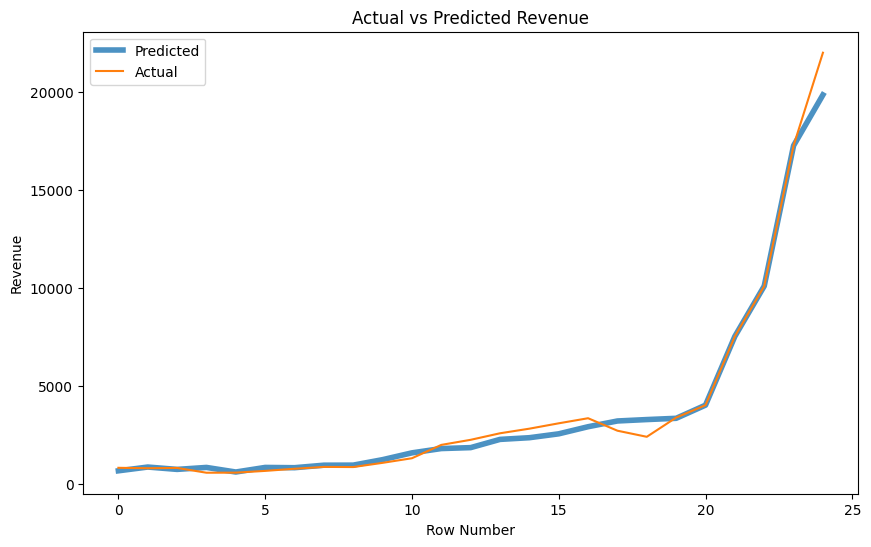

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# Combine training and test predictions and actual values
pred = np.concatenate([pred_train, pred_test])
actual = np.concatenate([y_train, y_test])

# Plotting
plt.figure(figsize=(10, 6))

# Plot predicted values: wider and shallower
sns.lineplot(x=range(len(pred)), y=pred, label='Predicted', linewidth=4, alpha=0.8)

# Plot actual values: denser line
sns.lineplot(x=range(len(actual)), y=actual, label='Actual', linewidth=1.5, alpha=1)

# Add labels and title
plt.xlabel('Row Number')
plt.ylabel('Revenue')
plt.title('Actual vs Predicted Revenue')

# Show the legend
plt.legend()

# Display the plot
plt.show()



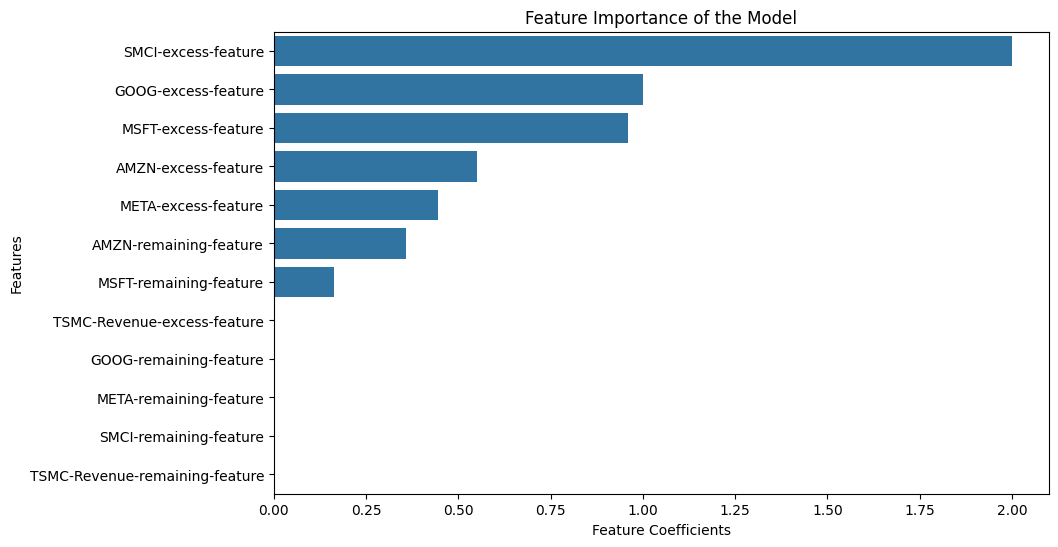

In [147]:
# plot feature importance

import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = model.coef_
feature_importance = pd.Series(feature_importance, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Feature Coefficients')
plt.ylabel('Features')
plt.title('Feature Importance of the Model')
plt.show()

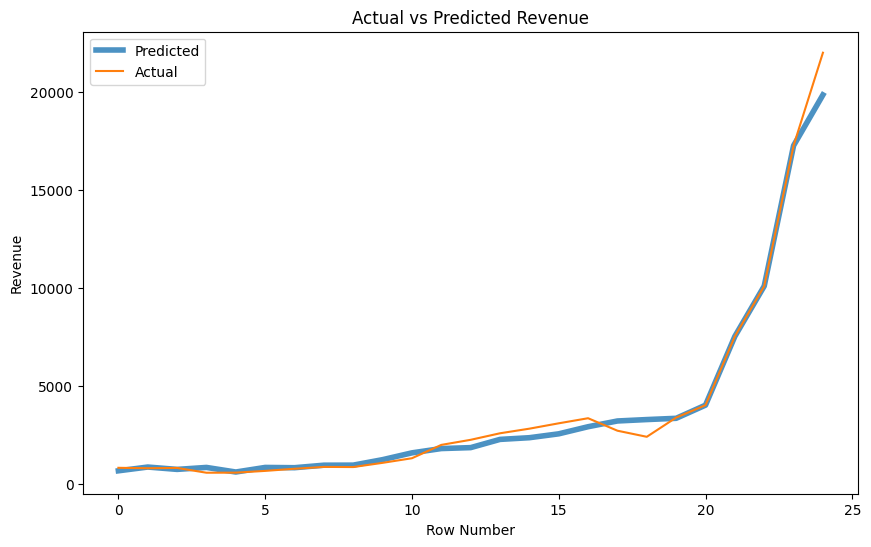

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# Combine training and test predictions and actual values
pred = np.concatenate([pred_train, pred_test])
actual = np.concatenate([y_train, y_test])

# Plotting
plt.figure(figsize=(10, 6))

# Plot predicted values: wider and shallower
sns.lineplot(x=range(len(pred)), y=pred, label='Predicted', linewidth=4, alpha=0.8)

# Plot actual values: denser line
sns.lineplot(x=range(len(actual)), y=actual, label='Actual', linewidth=1.5, alpha=1)

# Add labels and title
plt.xlabel('Row Number')
plt.ylabel('Revenue')
plt.title('Actual vs Predicted Revenue')

# Show the legend
plt.legend()

# Display the plot
plt.show()

In [149]:
merge_df[excess_features]

,AMZN-excess-feature,GOOG-excess-feature,MSFT-excess-feature,META-excess-feature,SMCI-excess-feature,TSMC-Revenue-excess-feature
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.00


In [150]:
excess_features = [f"{feature}-excess-feature" for feature in original_features]
remaining_features = [f"{feature}-remaining-feature" for feature in original_features]

y = merge_df["NVDA"]

X = merge_df[excess_features]
print(X.columns)
X_train = X.iloc[20:max_train_row_number]
y_train = y.iloc[20:max_train_row_number]
X_test = X.iloc[max_train_row_number:test_set_row_number]
y_test = y.iloc[max_train_row_number:test_set_row_number]
X_pred = X.iloc[pred_row_number:]

model = BoundedGLM()
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)

print(f'Predicted (Row 24): {y_pred_test}, Actual: {y_test.to_numpy()}')

y_pred_next = model.predict(X_pred)[0]

if JUST_DATACENTER:
    y_pred_next = y_pred_next + last_nvda_non_datacenter
print(f'Predicted NVIDIA Revenue for Row 25: {y_pred_next}')


absolute_error = np.mean(abs(y_test - y_pred_test))
absolute_error

Index(['AMZN-excess-feature', 'GOOG-excess-feature', 'MSFT-excess-feature',
       'META-excess-feature', 'SMCI-excess-feature',
       'TSMC-Revenue-excess-feature'],
      dtype='object')
Predicted (Row 24): [19394.51726025], Actual: [21981.136]
Predicted NVIDIA Revenue for Row 25: 30092.286782849133


np.float64(2586.618739752452)

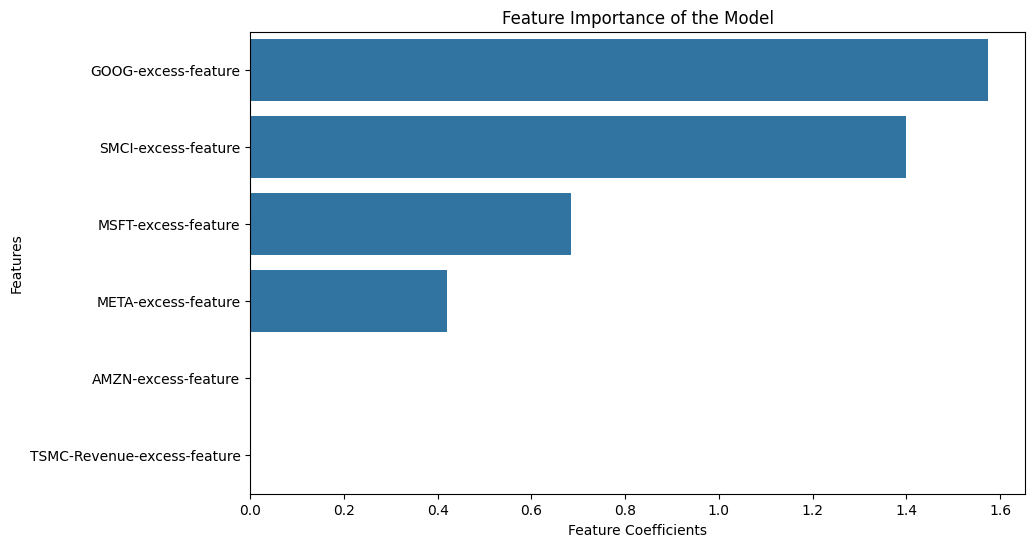

In [151]:
# plot feature importance

import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = model.coef_
feature_importance = pd.Series(feature_importance, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Feature Coefficients')
plt.ylabel('Features')
plt.title('Feature Importance of the Model')
plt.show()

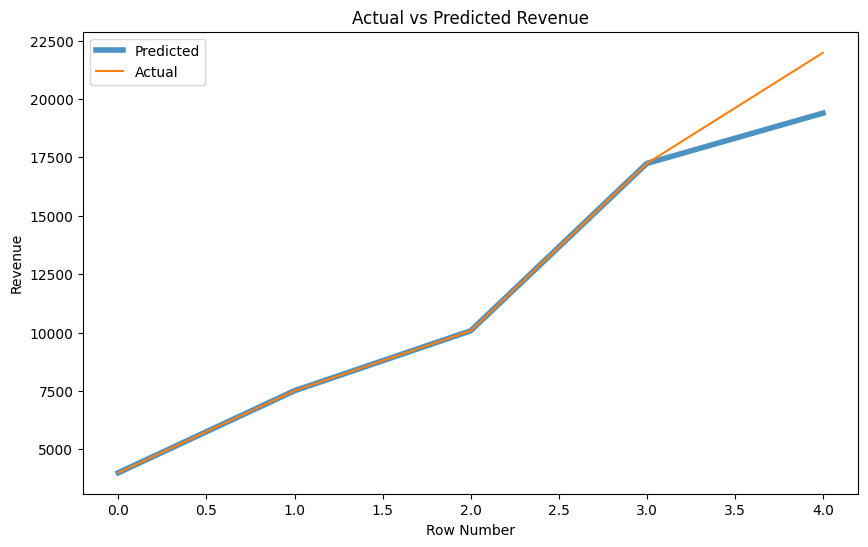

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# Combine training and test predictions and actual values
pred = np.concatenate([pred_train, pred_test])
actual = np.concatenate([y_train, y_test])

# Plotting
plt.figure(figsize=(10, 6))

# Plot predicted values: wider and shallower
sns.lineplot(x=range(len(pred)), y=pred, label='Predicted', linewidth=4, alpha=0.8)

# Plot actual values: denser line
sns.lineplot(x=range(len(actual)), y=actual, label='Actual', linewidth=1.5, alpha=1)

# Add labels and title
plt.xlabel('Row Number')
plt.ylabel('Revenue')
plt.title('Actual vs Predicted Revenue')

# Show the legend
plt.legend()

# Display the plot
plt.show()